<a href="https://colab.research.google.com/github/mohamedshouaib/iti/blob/main/Unsupervised_ML/t_sne_iminist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import numpy as np


In [2]:
# Load a dataset from the OpenML repository
dataset = fetch_openml(name='mnist_784', version=1)

# Extract features and target variable
X = dataset.data/255.0
y = dataset.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
X.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

In [4]:
feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]
X.columns=feat_cols
df = pd.DataFrame(X,columns=feat_cols)

df['y'] = y
df['label'] = df['y'].apply(lambda i:int(i))
df=df.drop(columns=["y"])

print('Size of the dataframe: {}'.format(df.shape))

###[out] Size of the dataframe: (70000, 785)

Size of the dataframe: (70000, 785)


In [5]:
df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  label  
0       0.0       0.0       0.0      5  
1       0.0       0.0       0.0      0  
2       0.0       0.0       0.0      4  
3       0.0       0.0       0.0      1  
4       0.0       0.0       0.0      9  

[5 rows x 785 columns]

In [6]:
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [7]:
df.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
label       0
Length: 785, dtype: int64

In [8]:
#TODO Apply PCA to the data and put the new components in the df under names of pca-one and pca-two and pca-three
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
df['pca-one'] = X_pca[:,0]
df['pca-two'] = X_pca[:,1]
df['pca-three'] = X_pca[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


<Axes: xlabel='pca-one', ylabel='pca-two'>

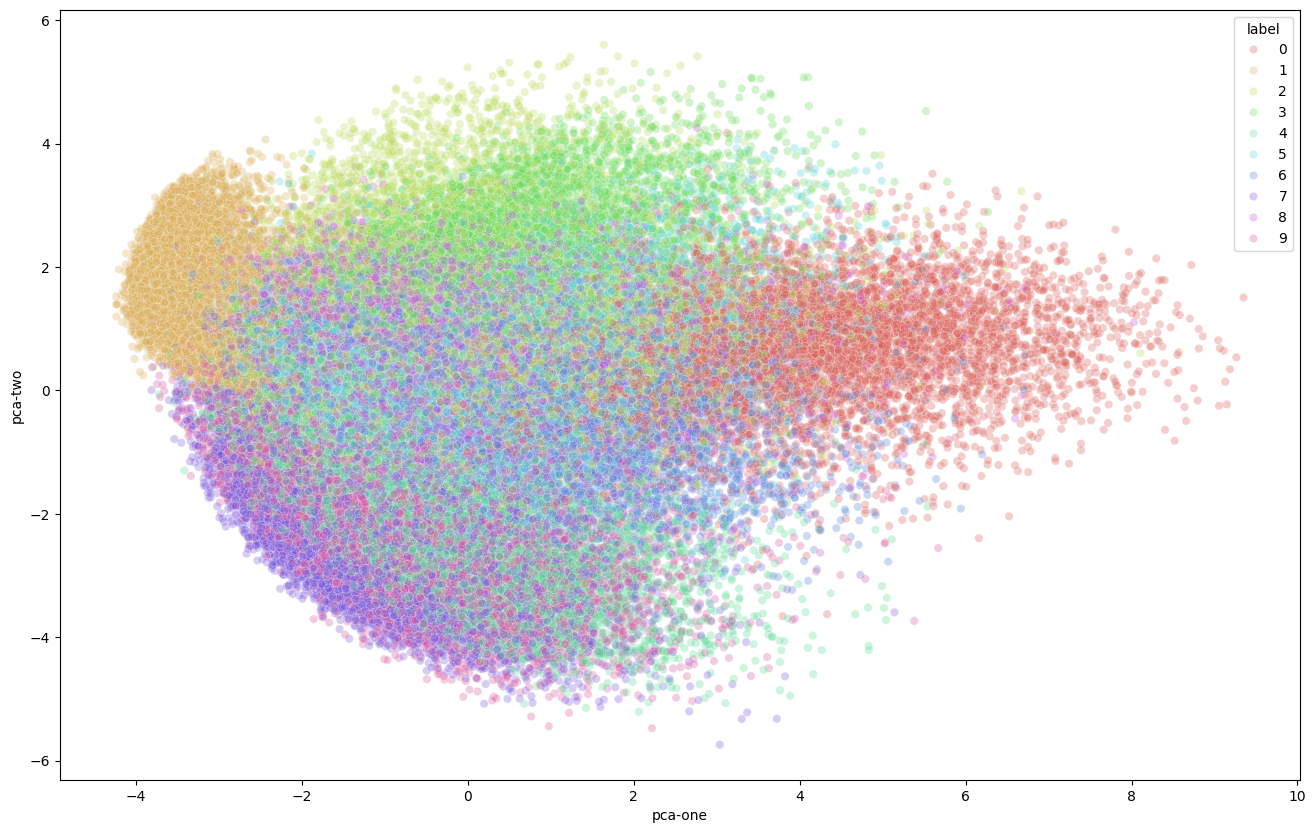

In [9]:
rnderm = np.random.permutation(df.shape[0])
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rnderm,:],
    legend="full",
    alpha=0.3
)

In [10]:
print(len(rndperm))
print(len(df.loc[rndperm, 'pca-one']))
print(df.loc[rndperm, 'label'])

70000
70000
46730    8
48393    4
41416    8
34506    7
43725    7
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: label, Length: 70000, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]


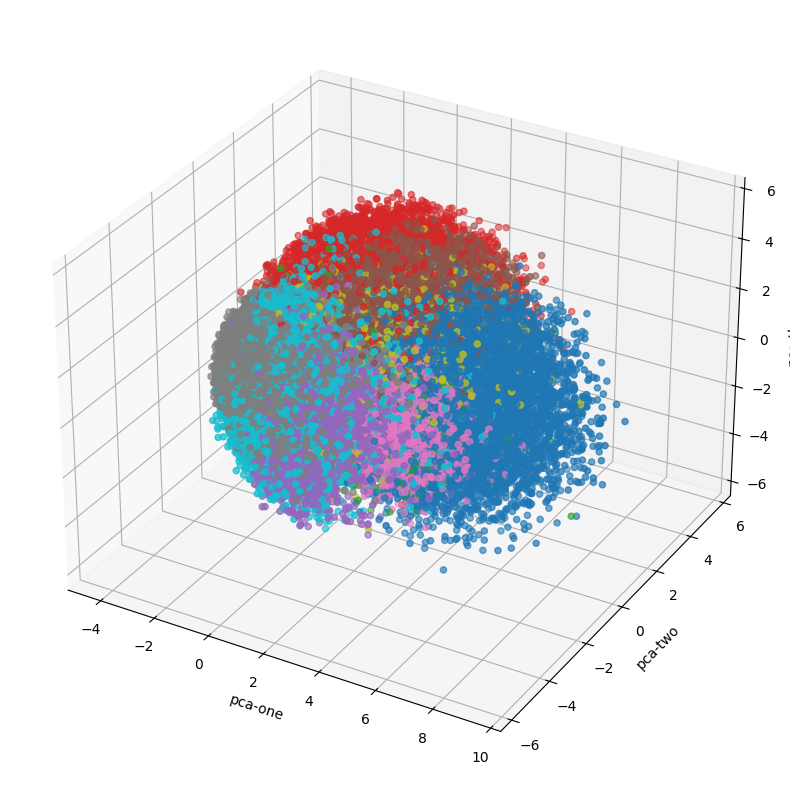

In [11]:
fig = plt.figure(figsize=(16, 10))
#ndperm = np.random.permutation(df.shape[0])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=df.loc[rndperm, 'pca-one'],
    ys=df.loc[rndperm, 'pca-two'],
    zs=df.loc[rndperm, 'pca-three'],
    c=list(df.loc[rndperm, 'label']),
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [12]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


In [13]:
#ToDO apply Tsne with perplexity=40, n_iter=300 to the data_subset and see the visualiztions
tsne = TSNE(n_components=3, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

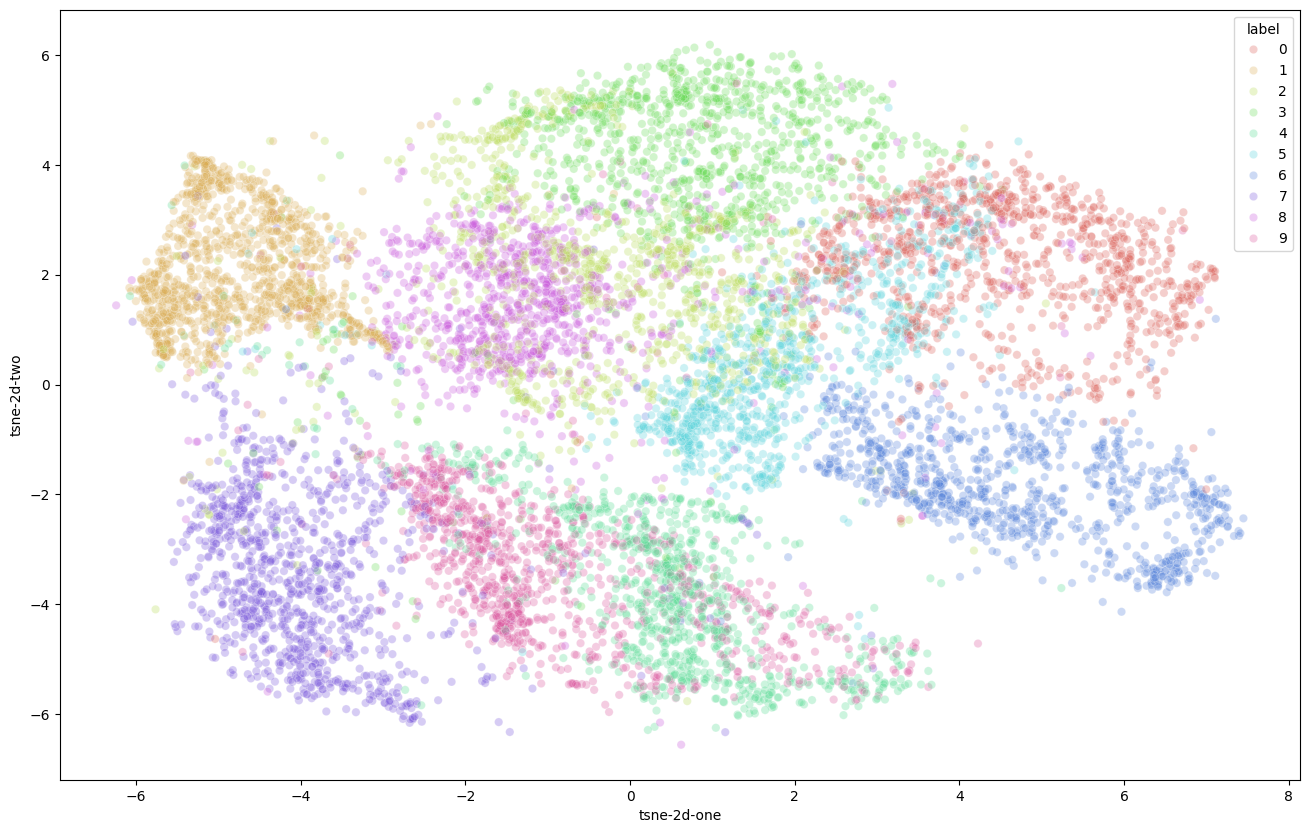

In [14]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

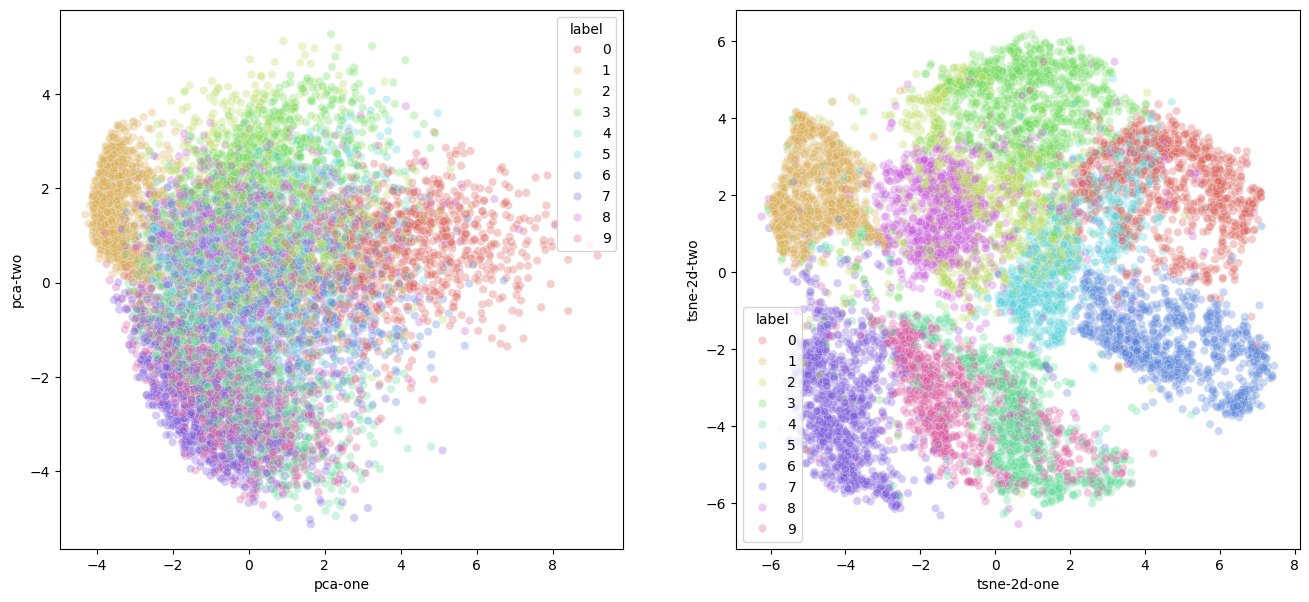

In [15]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### We can now take the recommendations to heart and reduce the number of dimensions before feeding the data into the t-SNE algorithm. We’ll use PCA again for this. We will first create a new data set containing the fifty dimensions generated by the PCA reduction algorithm. Then, we can use this dataset to perform the t-SNE.

In [16]:
# To Do Take 50 components from pca
pca = PCA(n_components=50)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09819946 0.07123677 0.06113222 0.05389196 0.04860683 0.04259303
 0.03336665 0.02922305 0.02782974 0.02376468 0.02092971 0.02011264
 0.01713892 0.01673122 0.0158643  0.01506206 0.01349786 0.01282187
 0.01179064 0.0114258  0.01049817 0.01019853 0.00985808 0.00925184
 0.00884266 0.00840735 0.00811475 0.00784379 0.0074114  0.00697318
 0.00654101 0.00647042 0.0060324  0.00583637 0.00555375 0.00538845
 0.00506675 0.00483528 0.00480211 0.00476082 0.0045283  0.00441205
 0.00413628 0.0039829  0.00381943 0.00374581 0.00359928 0.00345801
 0.00336285 0.00325078]


In [17]:
# Apply Tsne to the 50 components take from PCA
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


<Axes: xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

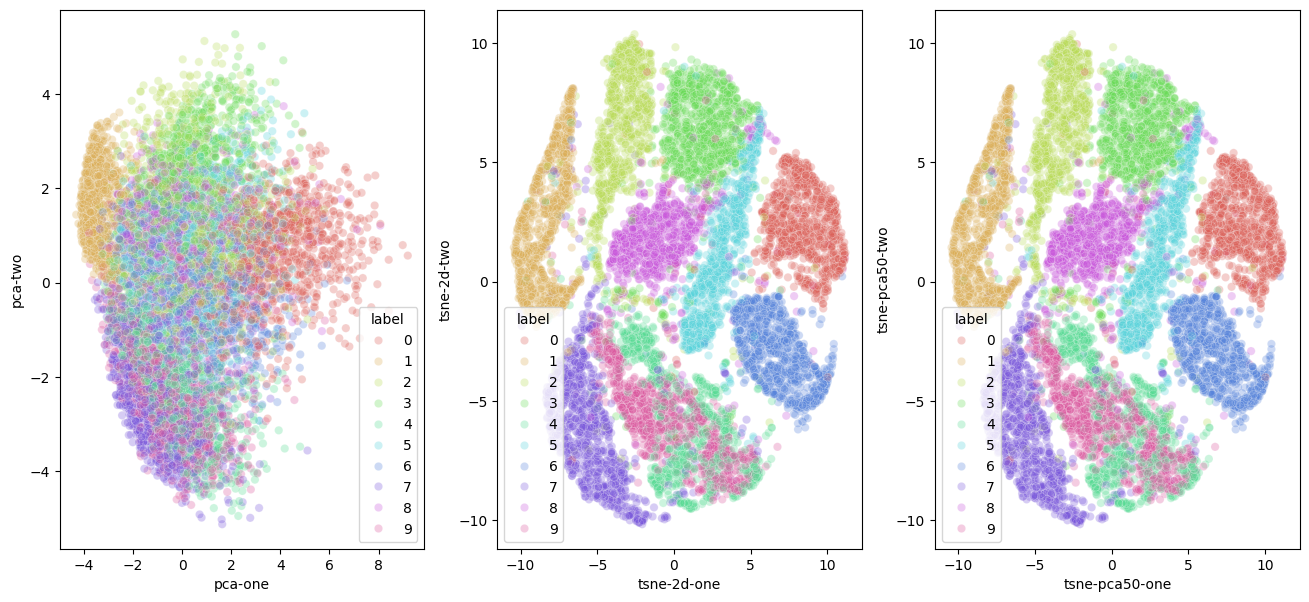

In [19]:
plt.figure(figsize=(16,7))
df_subset['tsne-pca50-one'] = tsne_results[:,0]
df_subset['tsne-pca50-two'] = tsne_results[:,1]

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

### From this plot, you’ll notice how all the samples are spaced apart and grouped together with their respective digits. This could be a great starting point to then use a clustering algorithm to try to identify the clusters. Or you can use these two dimensions as inputs to another algorithm like a neural network.